<h2 style="color: green; text-align: center; font-weight: bold;">Post class assignment</h2>

# Introduction

#### XYZ Bank - Term Deposit Subscription Prediction
* You are a data scientist at XYZ Bank, tasked with helping the bank increase the success rate of its term deposit campaigns. In the previous campaigns, the bank noticed that only a small fraction of customers subscribed to term deposits, and now they want to use data science to predict which customers are likely to subscribe.

<center><img src="https://dcbtehri.co.in/wp-content/uploads/2020/05/FD1.jpg"/></center>

* You’ve been provided with a dataset that includes information about customer demographics, financial behavior, and previous campaign contact history. Your task is to evaluate different machine learning models and help the bank efficiently target potential customers for their term deposit marketing efforts.

# Step 1: Import the neccessary libraries

In [128]:
# Import the necessary libraries(numpy, pandas, matplotlib, seaborn)
# Data manipulation and numerical operations

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Setting maximum limit of the number of columns visible
pd.set_option('display.max_columns', 30)

# Step 2: Load the data


### The dataset contains 16 features and a target as shown below:
1. `age`: The customer's age.
2. `job`: The type of job the customer has.
3. `marital`: The marital status of the customer.
4. `education`: The customer's level of education.
5. `default`: Whether the customer has credit in default.
6. `balance`: The average yearly balance in euros.
7. `housing`: Whether the customer has a housing loan.
8. `loan`: Whether the customer has a personal loan.
9. `contact`: The type of communication contact
10. `day`: The last contact day of the month.
11. `month`: The last contact month of the year.
12. `duration`: The last contact duration in seconds.
13. `campaign`: Number of contacts performed during this campaign.
14. `pdays`: Number of days since the client was last contacted.
15. `previous`: Number of contacts before this campaign.
16. `poutcome`: Outcome of the previous marketing campaign.
17. `y`: Whether the customer subscribed to the term deposit (yes/no).


### 2.1 Load the data & view it


Hint: Use ; as the seperator.

In [129]:
# Loading the data
# Read the csv file using a seperator ";"
data = pd.read_csv('./resources/bank-full.csv', sep=';')

# Viewing the data
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 2.2 View the columns of the data and understand them

In [130]:
# View the columns of the dataset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### 2.3 Check the shape of the dataset

In [131]:
# Checking the shape of the data
data.shape

(45211, 17)

### 2.4 Understand the datatypes of each of the columns

In [132]:
# Check the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 2.5 Get a summary of the dataset using the describe method.

In [133]:
# Get a statistical summary of the dataset
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# STEP 3: EDA



### 3.1  Check the value counts of the target variable y in the dataset

A common problem in binary classification tasks is data imbalance, where one class significantly outnumbers the other. In this question, you need to check whether the target variable y (whether the customer subscribed to a term deposit) is imbalanced in the dataset.

In [134]:
# Check the value counts in target column
data['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

### 3.2 Plot the distribution of the value counts for the target variable y

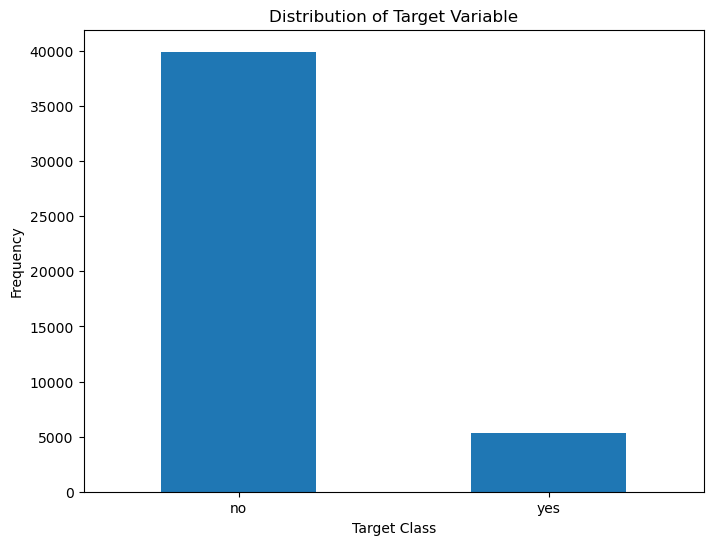

In [135]:
# Get the value counts of 'y'
value_counts = data['y'].value_counts()

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


### 3.3 Plot a pie chart to visualize the distribution of the target variable y, including the percentages of each category

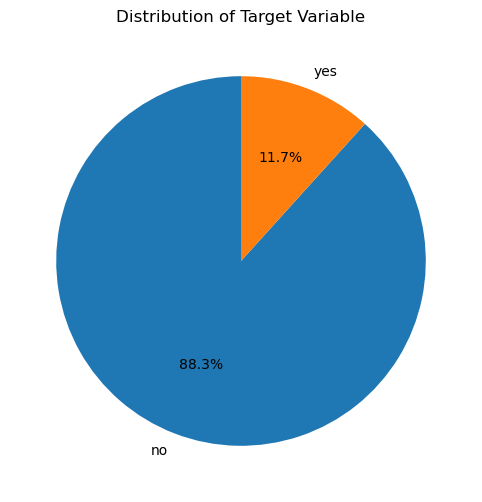

In [136]:
# Get the value counts of 'y'
value_counts = data['y'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.ylabel('')
plt.show()


### 3.4 Why do you think classs imabalnce is a problem, and list down your ideas on addressing the class imbalance?

### 3.5 For this problem what do you think is a good performance metric, precision, recall, f1-score or all of them? justify your answer.

# Step 4:  Data Preprocessing

### 4.1 Check for any duplicate rows in the dataset.

In [137]:
# Check for duplicate row
data.duplicated().sum()

0

### 4.2 Check the Null values


In [138]:
# Check for missing values in the dataset
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### 4.3 Split the data into train and test

In [139]:
# Assuming X and y are your features and target variable
# Split the data into 80% train and 20% test, stratifying by the target variable (y)
X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### 4.4 Seperate the numerical and catergorical columns for both train and test sets

In [140]:
# Divide the dataset into numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

# Separate numerical and categorical columns for train and test data
train_numerical = X_train[numerical_columns]
test_numerical = X_test[numerical_columns]

train_categorical = X_train[categorical_columns]
test_categorical = X_test[categorical_columns]


Numerical Columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


### 4.5 Standardize the numerical columns using StandardScaler()

In [141]:
# Apply StandardScaler to numerical columns in train and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply StandardScaler on train data (fit and transform)
train_numerical = scaler.fit_transform(train_numerical)

# Apply the scaler on test data (transform only)
test_numerical = scaler.transform(test_numerical)

### 4.6 Encode the categorical columns using OneHotEncoder

In [142]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply OneHotEncoder on train data (fit and transform)
train_categorical = encoder.fit_transform(train_categorical)

# Apply the encoder on test data (transform only)
test_categorical = encoder.transform(test_categorical)


### 4.7 Combine the both numerical and categorical columns

In [143]:
# Combine numerical and categorical columns in train and test data
train_processed = np.hstack((train_numerical, train_categorical))
test_processed = np.hstack((test_numerical, test_categorical))

# Convert the final train and test sets to DataFrames
train_processed = pd.DataFrame(np.hstack((train_numerical, train_categorical)), columns=numerical_columns + list(encoder.get_feature_names_out(categorical_columns)))
test_processed = pd.DataFrame(np.hstack((test_numerical, test_categorical)), columns=numerical_columns + list(encoder.get_feature_names_out(categorical_columns)))

# Display the first few rows of the final processed training set
train_processed.head()


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-0.460434,-0.164410,1.582124,-0.457311,-0.246104,-0.410910,-0.241509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.589641,0.899627,-1.298384,2.502493,0.398202,1.446096,2.664584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.292371,-0.365486,-0.458236,5.697691,0.398202,-0.410910,-0.241509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.668773,-0.445003,1.822166,-0.862499,2.653271,-0.410910,-0.241509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.272233,-0.361249,1.222060,-0.777602,2.331118,-0.410910,-0.241509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 4.8 Encode the target variable (`yes: 1` , `no: 0`)


In [144]:
# Encode the target variable in the training set
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Encode the target variable in the test set
y_test_encoded = label_encoder.transform(y_test)


### 4.9 Display the shape of the train sets and test sets

In [145]:
# Display the shape of sets
print("Shape of processed training set:", train_processed.shape)
print("Shape of processed test set:", test_processed.shape)
print("Shape of encoded training target:", y_train_encoded.shape)
print("Shape of encoded test target:", y_test_encoded.shape)


Shape of processed training set: (36168, 51)
Shape of processed test set: (9043, 51)
Shape of encoded training target: (36168,)
Shape of encoded test target: (9043,)


# Step 5: Model Building

### 5.1 Build a Logistic Regression Model

Build a Logistic regression model and check the model performance using precision, recall, F1 score, and the AUC from ROC curve with default threshold. Write your observations based on the result.

In [146]:
# Import LogisticRegression, required metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Train a Logistic Regression model
model = LogisticRegression()
model.fit(train_processed, y_train_encoded)

# Step 2: Predict probabilities for the test set (to calculate AUC later)
y_test_prob = model.predict_proba(test_processed)[:, 1]

# Step 3: Make predictions using the default threshold (0.5)
y_test_pred = (y_test_prob >= 0.5).astype(int)


# Step 4: Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test_encoded, y_test_pred)
recall = recall_score(y_test_encoded, y_test_pred)
f1 = f1_score(y_test_encoded, y_test_pred)

# Step 5: Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test_encoded, y_test_prob)

# Step 6: Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)


Precision: 0.6444833625218914
Recall: 0.34782608695652173
F1 Score: 0.4518109269490485
AUC: 0.9055740146044154


### 5.2 Build a Logistic Regression Model with Optimal Threshold


Build a logisitc model with optimal threshold and check perfomrance based on above-mentioned metrics. Mention your observations on the recall and F1-Score along with other metrics(use `class_weight` = 'balanced')

Optimal Threshold: 0.11142546148961548
Precision (Optimal): 0.40270880361173816
Recall (Optimal): 0.8431001890359168
F1 Score (Optimal): 0.5450656889703636
AUC (Optimal): 0.9055740146044154


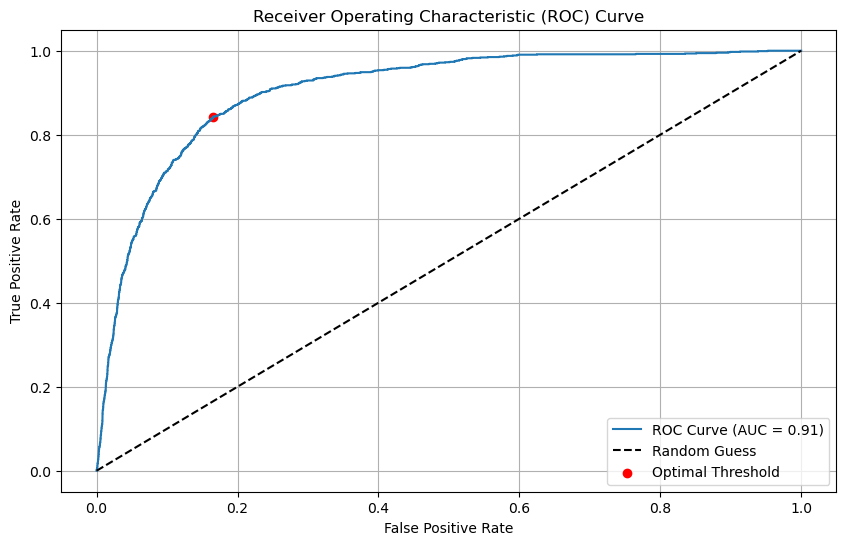

In [147]:
# Step 1: Train a Logistic Regression model
from sklearn.metrics import roc_curve

model = LogisticRegression()
model.fit(train_processed, y_train_encoded)

# Step 2: Predict probabilities for the test set (to calculate AUC and ROC curve)
y_test_prob = model.predict_proba(test_processed)[:, 1]

# Step 3: Compute ROC curve and find the optimal threshold
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_test_prob)

# Optimal threshold: the one that maximizes the difference between true positive rate and false positive rate
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Step 4: Make predictions using the optimal threshold
y_test_pred_optimal = (y_test_prob >= optimal_threshold).astype(int)

# Step 5: Calculate Precision, Recall, and F1 Score with the optimal threshold
precision_optimal = precision_score(y_test_encoded, y_test_pred_optimal)
recall_optimal = recall_score(y_test_encoded, y_test_pred_optimal)
f1_optimal = f1_score(y_test_encoded, y_test_pred_optimal)

# Step 6: Calculate AUC (Area Under the ROC Curve)
auc_optimal = roc_auc_score(y_test_encoded, y_test_prob)

# Step 7: Print the evaluation metrics
print("Optimal Threshold:", optimal_threshold)
print("Precision (Optimal):", precision_optimal)
print("Recall (Optimal):", recall_optimal)
print("F1 Score (Optimal):", f1_optimal)
print("AUC (Optimal):", auc_optimal)

#Step 8: Plot ROC Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_optimal))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', marker='o', label='Optimal Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


### 5.3 Build a KNN Model with k=5

Build a KNN model with k=5 and check the model performance using precision, recall, F1 score, write your observations on the metrics

In [148]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Make the train and test sets are in array format
X_train = train_processed
X_test = test_processed
y_train = y_train_encoded
y_test = y_test_encoded

# Step 1: Initialize and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Step 2: Predict probabilities for the test set (to calculate AUC later)
y_test_prob = knn.predict_proba(X_test)[:, 1]

# Step 3: Make predictions using the default threshold (0.5)
y_test_pred = (y_test_prob >= 0.5).astype(int)

# Step 4: Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
# Step 5: Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_test_prob)

# Step 6: Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)


Precision: 0.5990016638935108
Recall: 0.34026465028355385
F1 Score: 0.43399638336347196
AUC: 0.8277209275898927


### 5.4 Build a KNN Model with k=5 with a balanced set

#####  SMOTE the data to address class imbalance and build a KNN model with k=5 and check the model performance using precision, recall, F1 score; Compare the reuslts with the previous results and write your observations.

In [151]:
# Import modules
from imblearn.over_sampling import SMOTE

# Step 1: Apply SMOTE to the training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Resample X_train and y_train
X_train = X_train_resampled
y_train = y_train_resampled

# Convert the resampled data to NumPy arrays (if they are not already)
X_train = np.array(X_train)
y_train = np.array(y_train)

# Step 2: Initialize and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


# Step 3: Make predictions on the test set
y_test_prob = knn.predict_proba(X_test)[:, 1]

# Step 4: Calculate Precision, Recall, and F1 Score
y_test_pred = (y_test_prob >= 0.5).astype(int)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Step 5: Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_test_prob)

# Step 5: Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)


ImportError: numpy._core.multiarray failed to import

### 5.5 Build a Random forest model with n_estimators=10 and balanced class weight

#####  Build a Random forest with the given specifications and check the model performance using precision, recall, F1 score; Obtain the training set and test set metrics and write your observations.

In [ ]:
# Import required modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Initialize and train the Random Forest model with n_estimators=10
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Step 3: Make predictions on the training set
y_train_pred = rf.predict(X_train)

# Step 4: Calculate Precision, Recall, and F1 Score for the test set
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Step 5: Calculate Precision, Recall, and F1 Score for the training set
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Step 6: Print the evaluation metrics for the training set
print("Training Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)

# Step 7: Print the evaluation metrics for the test set
print("\nTest Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


### 5.6 Build a Random forest model with the following parameter grid and balanced class weight
##### param_grid:

```
'n_estimators': [100,200],          
'max_depth': [10,20,30],        
'min_samples_split': [2,5,10]
```



#####  Build a Random forest with the given specifications and check the model performance using precision, recall, F1 score; Obtain the test set metrics and compare it with the previous model results.

In [ ]:
# Import required modules

# Step 1: Define the hyperparameter grid
param_grid = {
    'n_estimators': [100,200],          # Number of trees
    'max_depth': [10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]         # Minimum samples required to split a node
}

# Step 2: Initialize the Random Forest model
rf_model =

# Step 3: Set up GridSearchCV
grid_search =

# Step 4: Fit the GridSearchCV on the training data


# Step 5: Get the best parameters and best estimator


# Step 6: Make predictions on the test set using the best model


# Step 7: Calculate Precision, Recall, and F1 Score for the best model



# Step 8: Print the evaluation metrics


### 5.7 Build a XGBoost model

#####  Build a default XGBoost model and check the model performance using precision, recall, F1 score for training and test sets; Give your comments .

In [ ]:
# Import required modules

# Step 1: Initialize and train the XGBoost model
xgb_model =

# Step 2: Train the model


# Step 3: Make predictions on the test set


# Step 4: Make predictions on the training set


# Step 5: Calculate Precision, Recall, and F1 Score for the test set


# Step 6: Calculate Precision, Recall, and F1 Score for the training set


# Step 7: Print the evaluation metrics for the training set


# Step 8: Print the evaluation metrics for the test set




### 5.8 XGBoost model with hyper parameter tuning

#####  Build a XGBoost model with the following parameter grid and check the model performance using precision, recall, F1 score on test set; Compare your result with the default XGBoost model .

#### Hyperparameter grid:
    - 'n_estimators': [50, 100, 200, 300],                 
    - 'learning_rate': [0.01, 0.1, 0.2, 0.3],              
    - 'max_depth': [None, 3, 5, 7, 10],                          
    - 'min_child_weight': [1, 3, 5],                      
    - 'subsample': [0.2, 0.6, 0.8, 1.0],                        
    - 'colsample_bytree': [0.6, 0.8, 1.0],                 
    - 'gamma': [0, 0.1, 0.3, 0.5]                          

In [ ]:
# Import required modules

# Step 1: Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],                 # Number of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],              # Learning rate
    'max_depth': [None, 3, 5, 7, 10],                          # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],                       # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.2, 0.6, 0.8, 1.0],                        # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],                 # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3, 0.5]                          # Minimum loss reduction required to make a further partition on a leaf node
}

neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

# Step 2: Initialize the XGBoost model
xgb_model =

# Step 3: Set up the RandomizedSearchCV
random_search =


# Step 4: Fit the RandomizedSearchCV on the training data


# Step 5: Get the best parameters and best estimator



# Step 6: Make predictions on the test set using the best model


# Step 7: Calculate Precision, Recall, and F1 Score for the best model


# Step 8: Print the evaluation metrics



### 5.9 XGBoost model with hyper parameter tuning and SMOTE

#####  Build a XGBoost model with the parameter grid given in the previous problem and also balance the dataset with SMOTE and check the model performance using precision, recall, F1 score on test set; Compare your result with previous XGboost models .

In [ ]:
# Import required modules

# Step 1: Apply SMOTE to the training data to handle class imbalance


# Step 2: Define the hyperparameter grid for XGBoost
param_dist = {
    'n_estimators': [50, 100, 200, 300],                 # Number of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],              # Learning rate
    'max_depth': [3, 5, 7, 10],                          # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],                       # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.6, 0.8, 1.0],                        # Subsample ratio of the training instance
    'colsample_bytree': [0.2, 0.6, 0.8, 1.0],                 # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3, 0.5]                          # Minimum loss reduction required to make a further partition on a leaf node
}

# Step 3: Initialize the XGBoost model

# Step 4: Set up RandomizedSearchCV

# Step 5: Fit RandomizedSearchCV on the SMOTEd training data

# Step 6: Get the best parameters and best estimator



# Step 7: Make predictions on the test set using the best model


# Step 8: Calculate Precision, Recall, and F1 Score for the best model


# Step 9: Print the evaluation metrics



### 5.10 Best model selection

#####  Evaluate the test set performance of all 9 models and create horizontal bar plots for each individual metric to visualize the results effectively. Based on the plots and your analysis, select the top three models and provide your reasoning for the selection..

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Model names and their corresponding metrics (precision, recall, F1 score)
model_names = [
    "Default Logistic Regression", "Logistic Regression with Optimal Threshold",
    "KNN (k=5)", "KNN (k=5) + SMOTE", "Random Forest (10 Trees)",
    "Tuned Random Forest", "Default XGBoost", "Tuned XGBoost",
    "Tuned XGBoost + SMOTE"
]

precision_scores =
recall_scores =
f1_scores =

# Creating a DataFrame for easier manipulation
df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

# Sorting the DataFrame for each metric
df_precision_sorted = df.sort_values(by='Precision', ascending=False)
df_recall_sorted = df.sort_values(by='Recall', ascending=False)
df_f1_sorted = df.sort_values(by='F1-Score', ascending=False)

# Set style for plots
sns.set(style="whitegrid")

# Plot for Precision


# Plot for Recall


# Plot for F1-Score

